In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

In [5]:
births = pd.read_csv('data/births.csv')
quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74*(quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @ sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

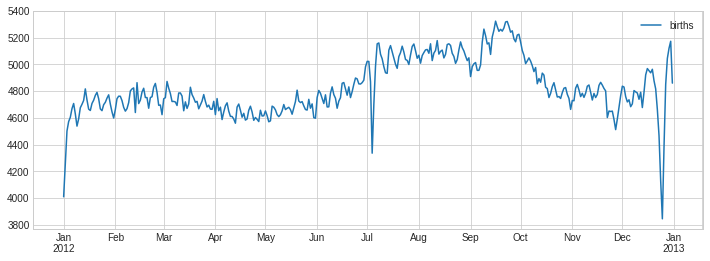

In [6]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

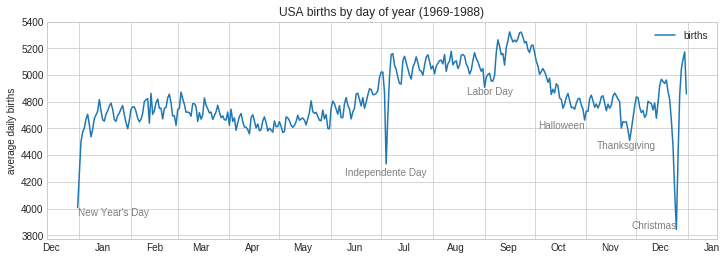

In [9]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)
#add labels to plot
style = dict(size=10, color='gray')
ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independente Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas", ha='right', **style)
#label axes
ax.set(title='USA births by day of year (1969-1988)', ylabel='average daily births')
#format x axis
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))